# Dimensionality Reduction of Omics Data
In this notebook, I want to explore the degree of separation between samples for the different _-Omics_ data types.
For that, I load the $gene \times sample$ matrices for DNA methylation, gene expression, SNVs and CNAs and perform a UMAP embedding per sample.
I then compute the embedding also for the combined dataset as well without any normalization.

In [1]:
import pandas as pd
import umap
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Times New Roman')
%matplotlib inline

/home/sasse/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
submitter_project_mapping = pd.read_json('../../data/pancancer/TCGA/mutation/download_new/cases_all_cancers.2018-11-26.json')
submitter_project_mapping.head()
submitter_project_mapping['Cancer_Type'] = [dict(i)['project_id'] for i in submitter_project_mapping.project]
submitter_project_mapping = submitter_project_mapping[['submitter_id', 'Cancer_Type']].set_index('submitter_id')
submitter_project_mapping['Cancer_Type'] = [i[1] for i in submitter_project_mapping.Cancer_Type.str.split('-')]
trim_to_submitter = lambda x: '-'.join(str(x).split('-')[:3]) # TCGA barcode until patient

## UMAP for gene expression data

In [3]:
ge_samples = pd.read_hdf('../../data/pancancer/TCGA/expression/sample_matrix_fc_tcga.h5').T

# get TCGA study name for samples
ge_samples.index = ge_samples.index.map(trim_to_submitter)
ge_samples = ge_samples.join(submitter_project_mapping)

In [4]:
reducer = umap.UMAP(n_components=2)
emb = reducer.fit_transform(ge_samples.drop('Cancer_Type', axis=1))

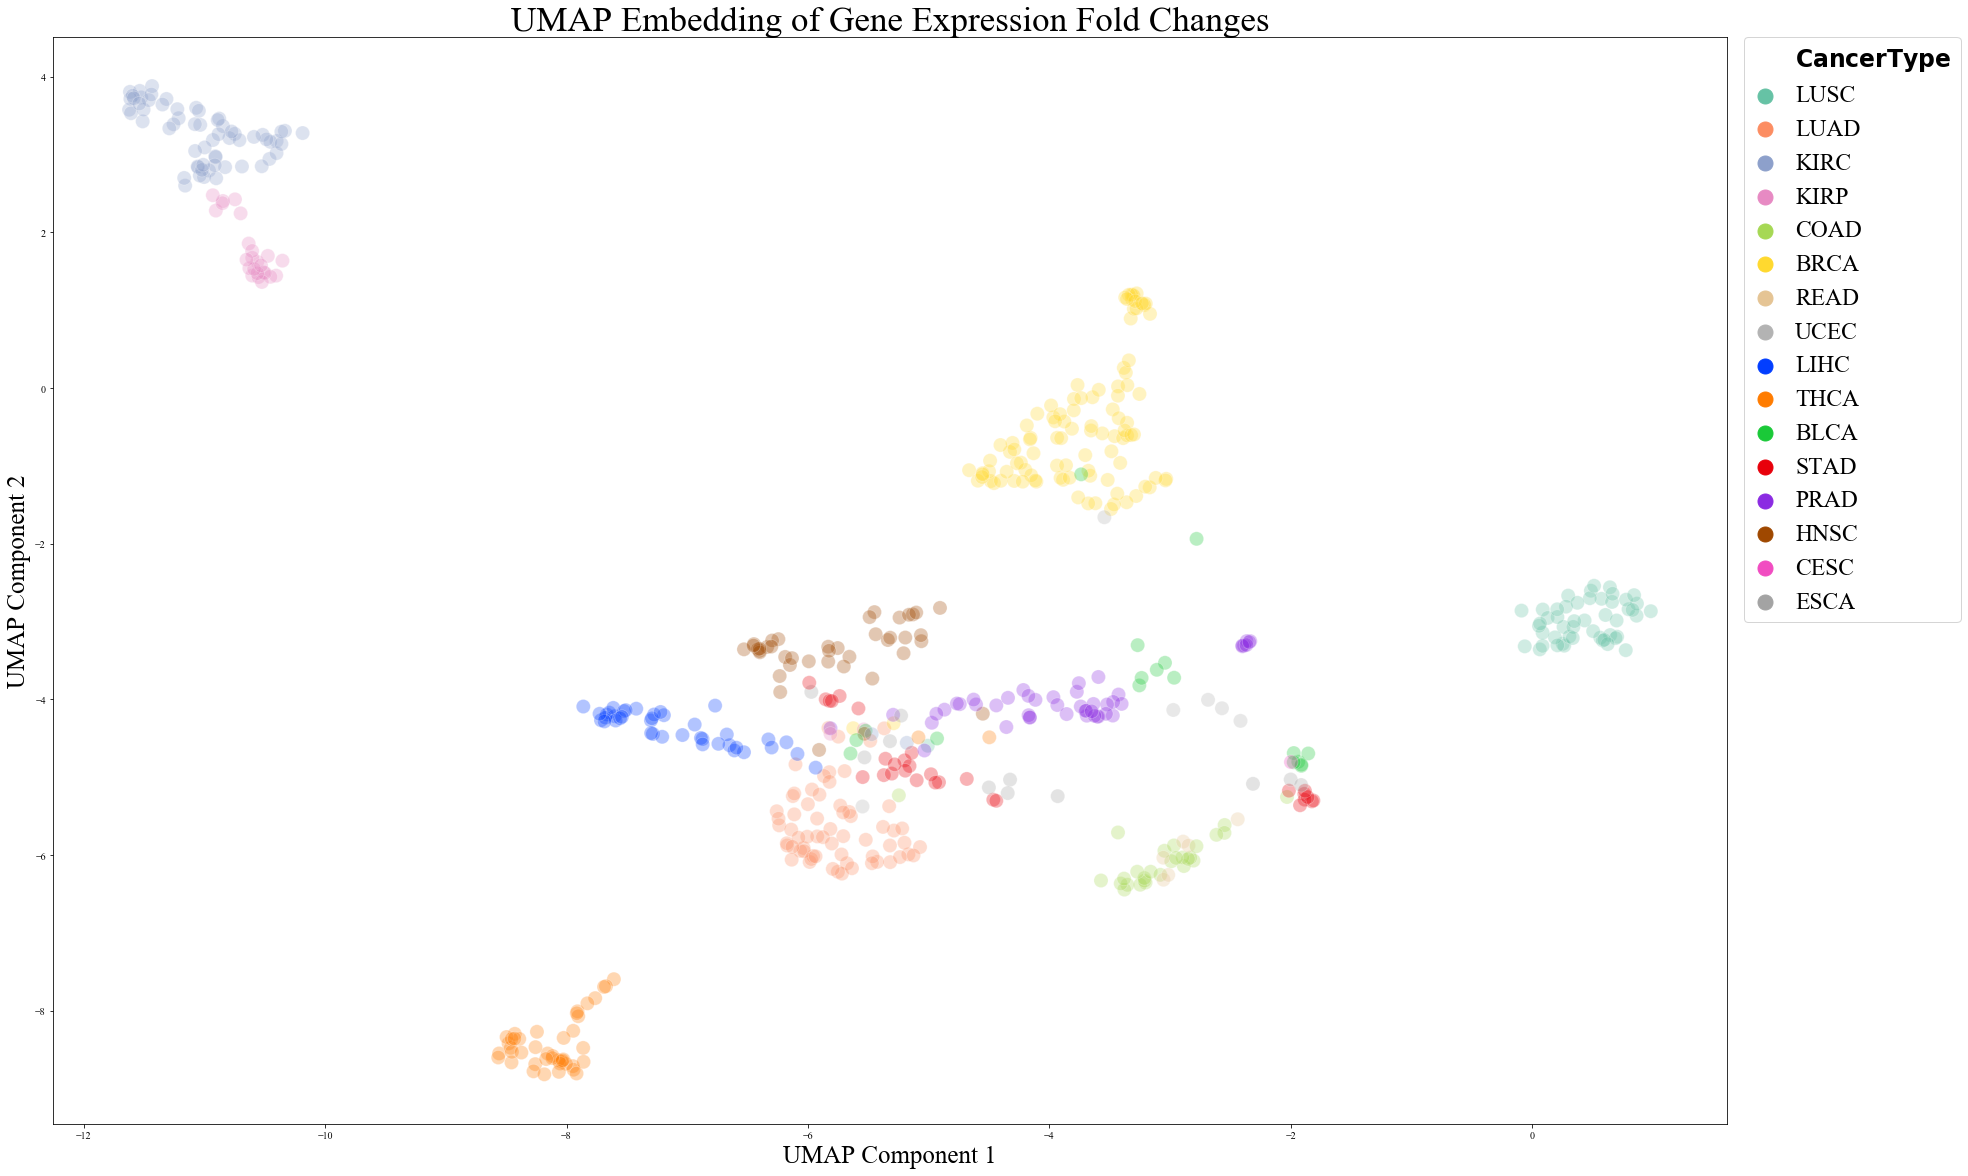

In [5]:
emb_df = pd.DataFrame(emb, index=ge_samples.index, columns=['PC1', 'PC2'])
emb_df['Type'] = ge_samples.Cancer_Type.str.upper()

fig = plt.figure(figsize=(30, 20))
g = sns.scatterplot(data=emb_df, x='PC1', y='PC2', hue='Type',
                    alpha=0.3, s=200, palette=sns.color_palette("Set2", n_colors=8)+sns.color_palette("bright", n_colors=8))
g.set_xlabel('UMAP Component 1', fontsize=25)
g.set_ylabel('UMAP Component 2', fontsize=25)
legend = plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., prop={'size': 23.5}, handlelength=1,
                    markerscale=2.5)
legend.texts[0].set_text(r"$\bf{Cancer Type}$")
#legend.texts[17].set_text(r"$\bf{Type}$")
g.set_title('UMAP Embedding of Gene Expression Fold Changes', fontsize=35)
fig.savefig('../../data/pancancer/TCGA/expression/UMAP_embedding_expression.png', dpi=300)

## UMAP for DNA Methylation data

In [6]:
meth_samples = pd.read_hdf('../../data/pancancer/TCGA/methylation/sample_matrix_foldchanges.h5', 'methylation_sample_matrix').T

In [7]:
meth_samples['cancertype'] = [i[1] for i in meth_samples.index.str.split('|')]

reducer = umap.UMAP(n_components=2)
emb = reducer.fit_transform(meth_samples.drop('cancertype', axis=1))

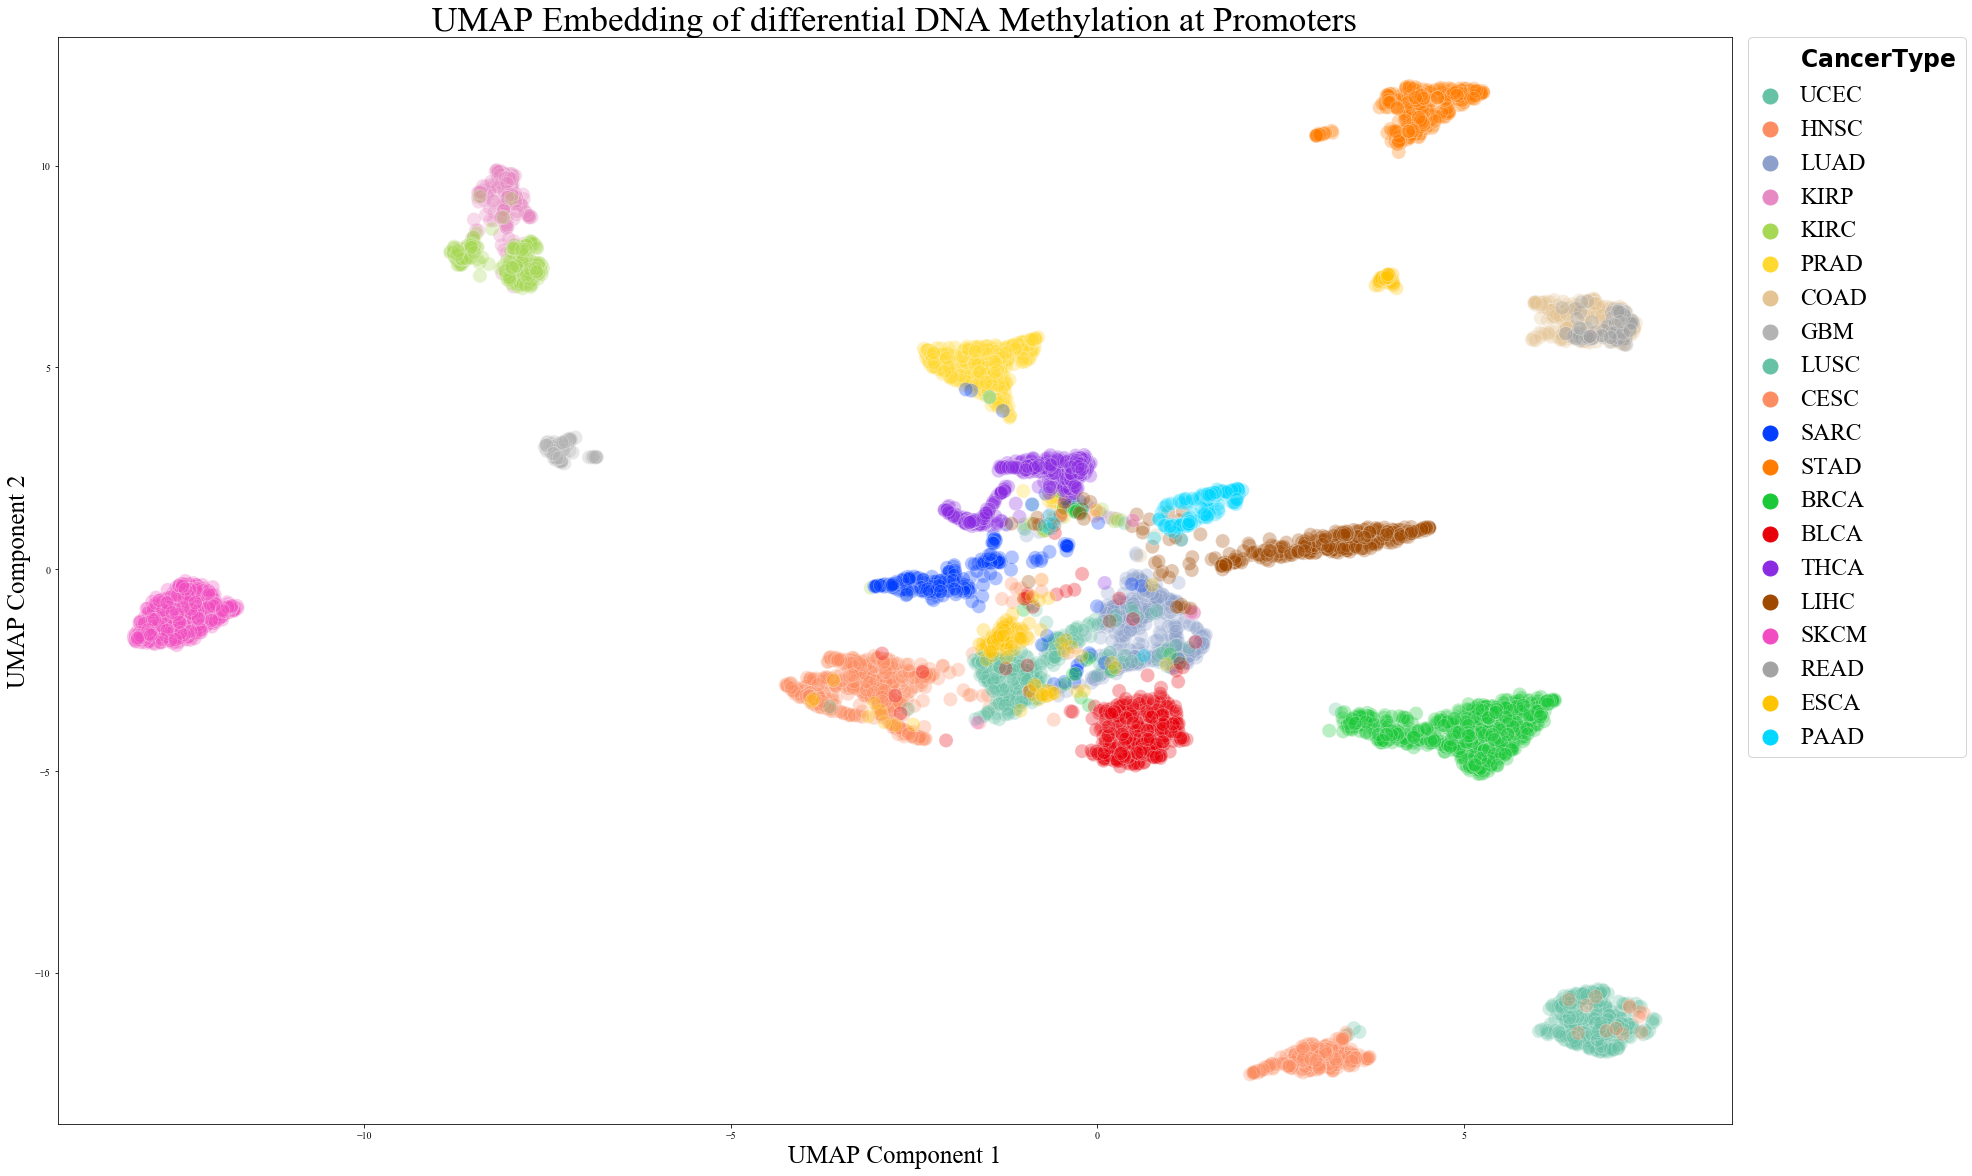

In [8]:
emb_df = pd.DataFrame(emb, index=meth_samples.index, columns=['PC1', 'PC2'])
emb_df['Type'] = meth_samples.cancertype.str.upper()

fig = plt.figure(figsize=(30, 20))
g = sns.scatterplot(data=emb_df, x='PC1', y='PC2', hue='Type',
                    alpha=0.3, s=200, palette=sns.color_palette("Set2", n_colors=10)+sns.color_palette("bright", n_colors=10))
g.set_xlabel('UMAP Component 1', fontsize=25)
g.set_ylabel('UMAP Component 2', fontsize=25)
legend = plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., prop={'size': 23.5}, handlelength=1,
                    markerscale=2.5)
legend.texts[0].set_text(r"$\bf{Cancer Type}$")
#legend.texts[17].set_text(r"$\bf{Type}$")
g.set_title('UMAP Embedding of differential DNA Methylation at Promoters', fontsize=35)
fig.savefig('../../data/pancancer/TCGA/expression/UMAP_embedding_methylation.png', dpi=300)

## UMAP for SNV sample data

In [9]:
snv_samples = pd.read_hdf('../../data/pancancer/TCGA/mutation/mutation_frequencies_lengthnormalized.h5', 'snv_sample_matrix').T

# get TCGA study name for samples
snv_samples.index = snv_samples.index.map(trim_to_submitter)
snv_samples = snv_samples.join(submitter_project_mapping)

In [10]:
reducer = umap.UMAP(n_components=2)
emb = reducer.fit_transform(snv_samples.drop('Cancer_Type', axis=1))

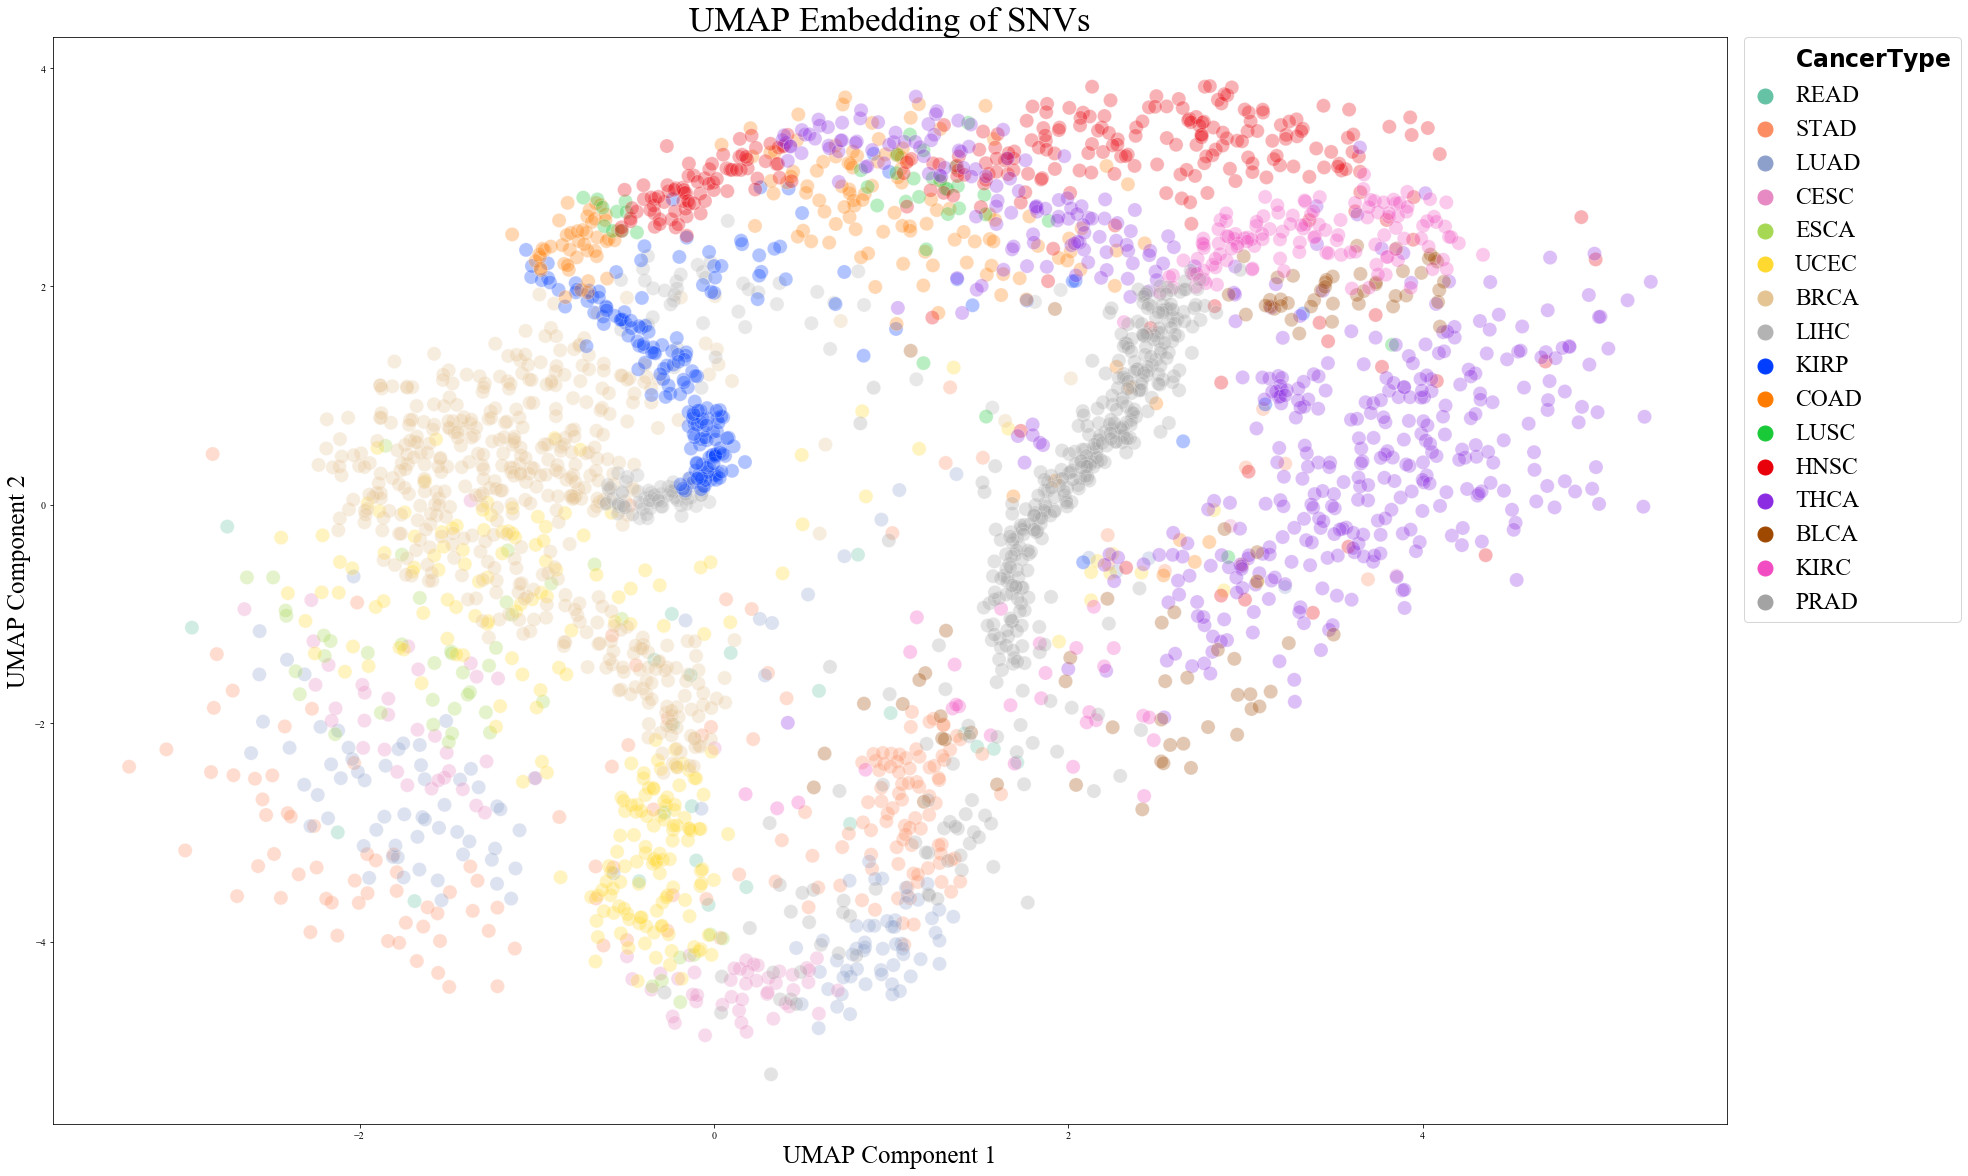

In [11]:
emb_df = pd.DataFrame(emb, index=snv_samples.index, columns=['PC1', 'PC2'])
emb_df['Type'] = snv_samples.Cancer_Type.str.upper()

fig = plt.figure(figsize=(30, 20))
g = sns.scatterplot(data=emb_df, x='PC1', y='PC2', hue='Type',
                    alpha=0.3, s=200, palette=sns.color_palette("Set2", n_colors=8)+sns.color_palette("bright", n_colors=8))
g.set_xlabel('UMAP Component 1', fontsize=25)
g.set_ylabel('UMAP Component 2', fontsize=25)
legend = plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., prop={'size': 23.5}, handlelength=1,
                    markerscale=2.5)
legend.texts[0].set_text(r"$\bf{Cancer Type}$")
#legend.texts[17].set_text(r"$\bf{Type}$")
g.set_title('UMAP Embedding of SNVs', fontsize=35)
fig.savefig('../../data/pancancer/TCGA/expression/UMAP_embedding_SNVs.png', dpi=300)

### Load CNA data

In [12]:
cna_samples = pd.read_hdf('../../data/pancancer/TCGA/mutation/mutation_frequencies_lengthnormalized.h5', 'cna_sample_matrix').T

# get TCGA study name for samples
cna_samples.index = cna_samples.index.map(trim_to_submitter)
cna_samples = cna_samples.join(submitter_project_mapping)

In [13]:
reducer = umap.UMAP(n_components=2)
emb = reducer.fit_transform(cna_samples.drop('Cancer_Type', axis=1))

/home/sasse/.local/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


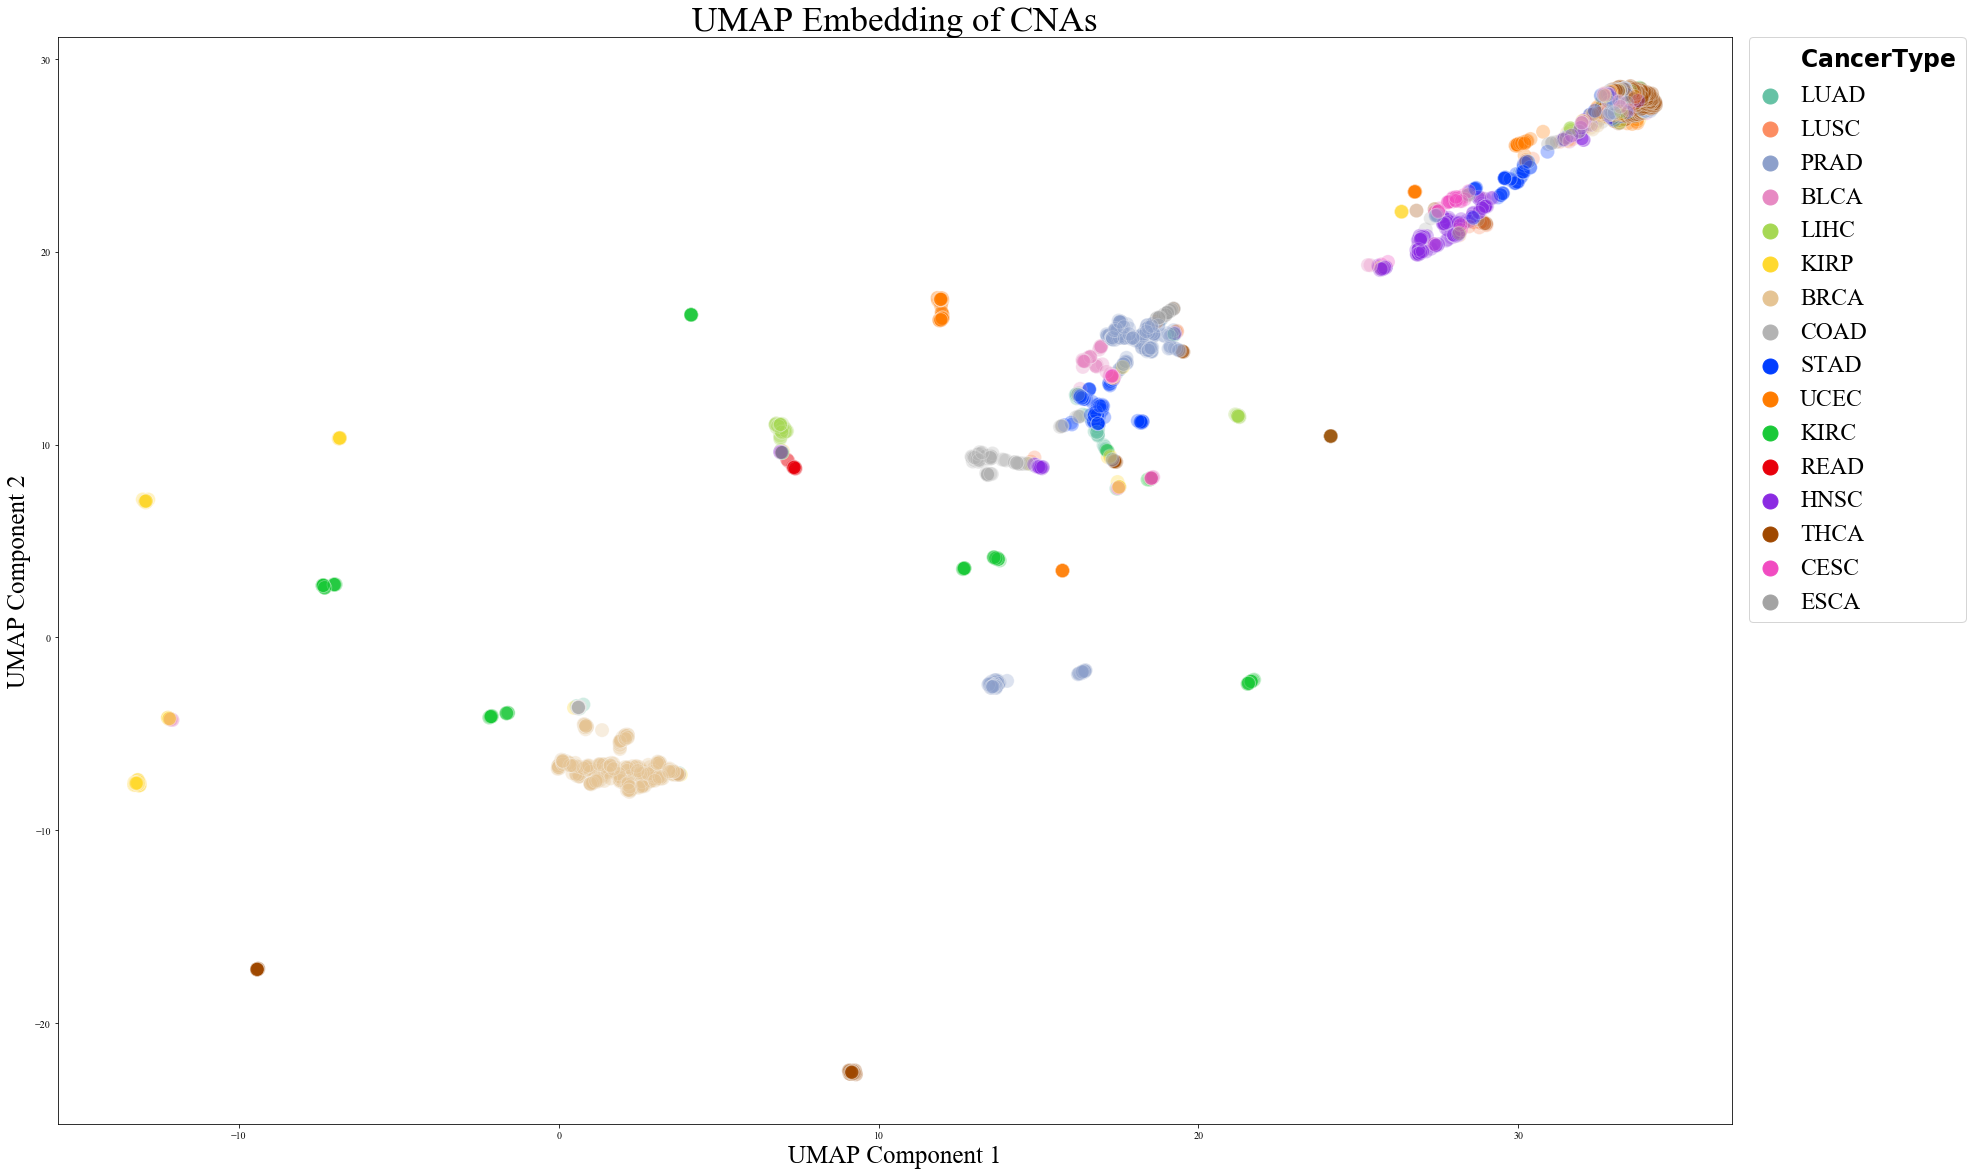

In [14]:
emb_df = pd.DataFrame(emb, index=cna_samples.index, columns=['PC1', 'PC2'])
emb_df['Type'] = cna_samples.Cancer_Type.str.upper()

fig = plt.figure(figsize=(30, 20))
g = sns.scatterplot(data=emb_df, x='PC1', y='PC2', hue='Type',
                    alpha=0.3, s=200, palette=sns.color_palette("Set2", n_colors=8)+sns.color_palette("bright", n_colors=8))
g.set_xlabel('UMAP Component 1', fontsize=25)
g.set_ylabel('UMAP Component 2', fontsize=25)
legend = plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., prop={'size': 23.5}, handlelength=1,
                    markerscale=2.5)
legend.texts[0].set_text(r"$\bf{Cancer Type}$")
#legend.texts[17].set_text(r"$\bf{Type}$")
g.set_title('UMAP Embedding of CNAs', fontsize=35)
fig.savefig('../../data/pancancer/TCGA/expression/UMAP_embedding_CNAs.png', dpi=150)

## UMAP of Multi-Omics data

In [15]:
meth_samples.index = [trim_to_submitter(i[0]) for i in meth_samples.index.str.split('|')]
meth_samples.head()

,A1BG,A1BG-AS1,A2M,A2ML1,A4GNT,AAAS,AACS,AADAC,AADACL3,AADACL4,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,yR211F11.2,cancertype
TCGA-2E-A9G8,-0.312389,-0.037120,0.188502,-0.339166,0.024405,0.110479,-0.004424,-0.032778,-0.218381,-0.108816,...,-0.232663,-0.260999,-0.031894,-0.057507,-0.008172,-0.008778,-0.004812,-0.007981,-0.004533,ucec
TCGA-FI-A2D5,-0.171679,0.003336,0.177219,-0.305247,-0.081893,-0.040340,-0.018587,-0.009362,0.015550,-0.073883,...,-0.110089,-0.094550,-0.019790,-0.133075,0.000625,-0.004002,0.004213,-0.004311,-0.013623,ucec
TCGA-EY-A1G8,-0.379949,-0.018939,0.181447,-0.350472,0.091793,-0.193645,0.004689,0.015558,0.076662,0.014829,...,-0.060960,-0.064691,-0.028854,0.263246,-0.004411,-0.007229,0.002600,-0.006722,0.014516,ucec
TCGA-AX-A1CR,0.117772,-0.005204,0.239123,-0.384862,0.054119,-0.058901,0.002986,-0.025295,-0.181734,0.001927,...,-0.262585,-0.224631,-0.027693,-0.152138,-0.007631,-0.013564,0.009856,-0.006036,-0.009056,ucec
TCGA-AJ-A6NU,-0.139174,0.187545,0.287604,-0.070037,-0.073537,-0.025241,-0.001688,-0.010456,0.052793,-0.026732,...,-0.066705,-0.037955,-0.011489,-0.060172,-0.001018,-0.011870,-0.009904,-0.004939,0.001745,ucec


In [16]:
def _prep_for_join(df, prefix):
    df.columns = ['{}: {}'.format(prefix, i) for i in df.columns]
    df.drop(df.columns[df.columns.str.contains('cancertype')], axis=1, inplace=True)
    df.drop(df.columns[df.columns.str.contains('Cancer_Type')], axis=1, inplace=True)
    return df

In [17]:
ge_mo_prepped = _prep_for_join(ge_samples, 'GE')
cna_mo_prepped = _prep_for_join(cna_samples, 'CNA')
snv_mo_prepped = _prep_for_join(snv_samples, 'SNV')
meth_mo_prepped = _prep_for_join(meth_samples, 'METH')

In [18]:
multi_omics_dataset = meth_mo_prepped.join([cna_mo_prepped, snv_mo_prepped, ge_mo_prepped], how='left')
multi_omics_dataset.fillna(0, inplace=True)

In [19]:
# get TCGA study name for samples
multi_omics_dataset = multi_omics_dataset.join(submitter_project_mapping)

In [20]:
ge_mo_prepped.shape, cna_mo_prepped.shape, snv_mo_prepped.shape, meth_mo_prepped.shape

((590, 14684), (2915, 21946), (3054, 21668), (7381, 26706))

In [21]:
reducer = PCA(n_components=2)
emb = reducer.fit_transform(multi_omics_dataset.drop('Cancer_Type', axis=1))

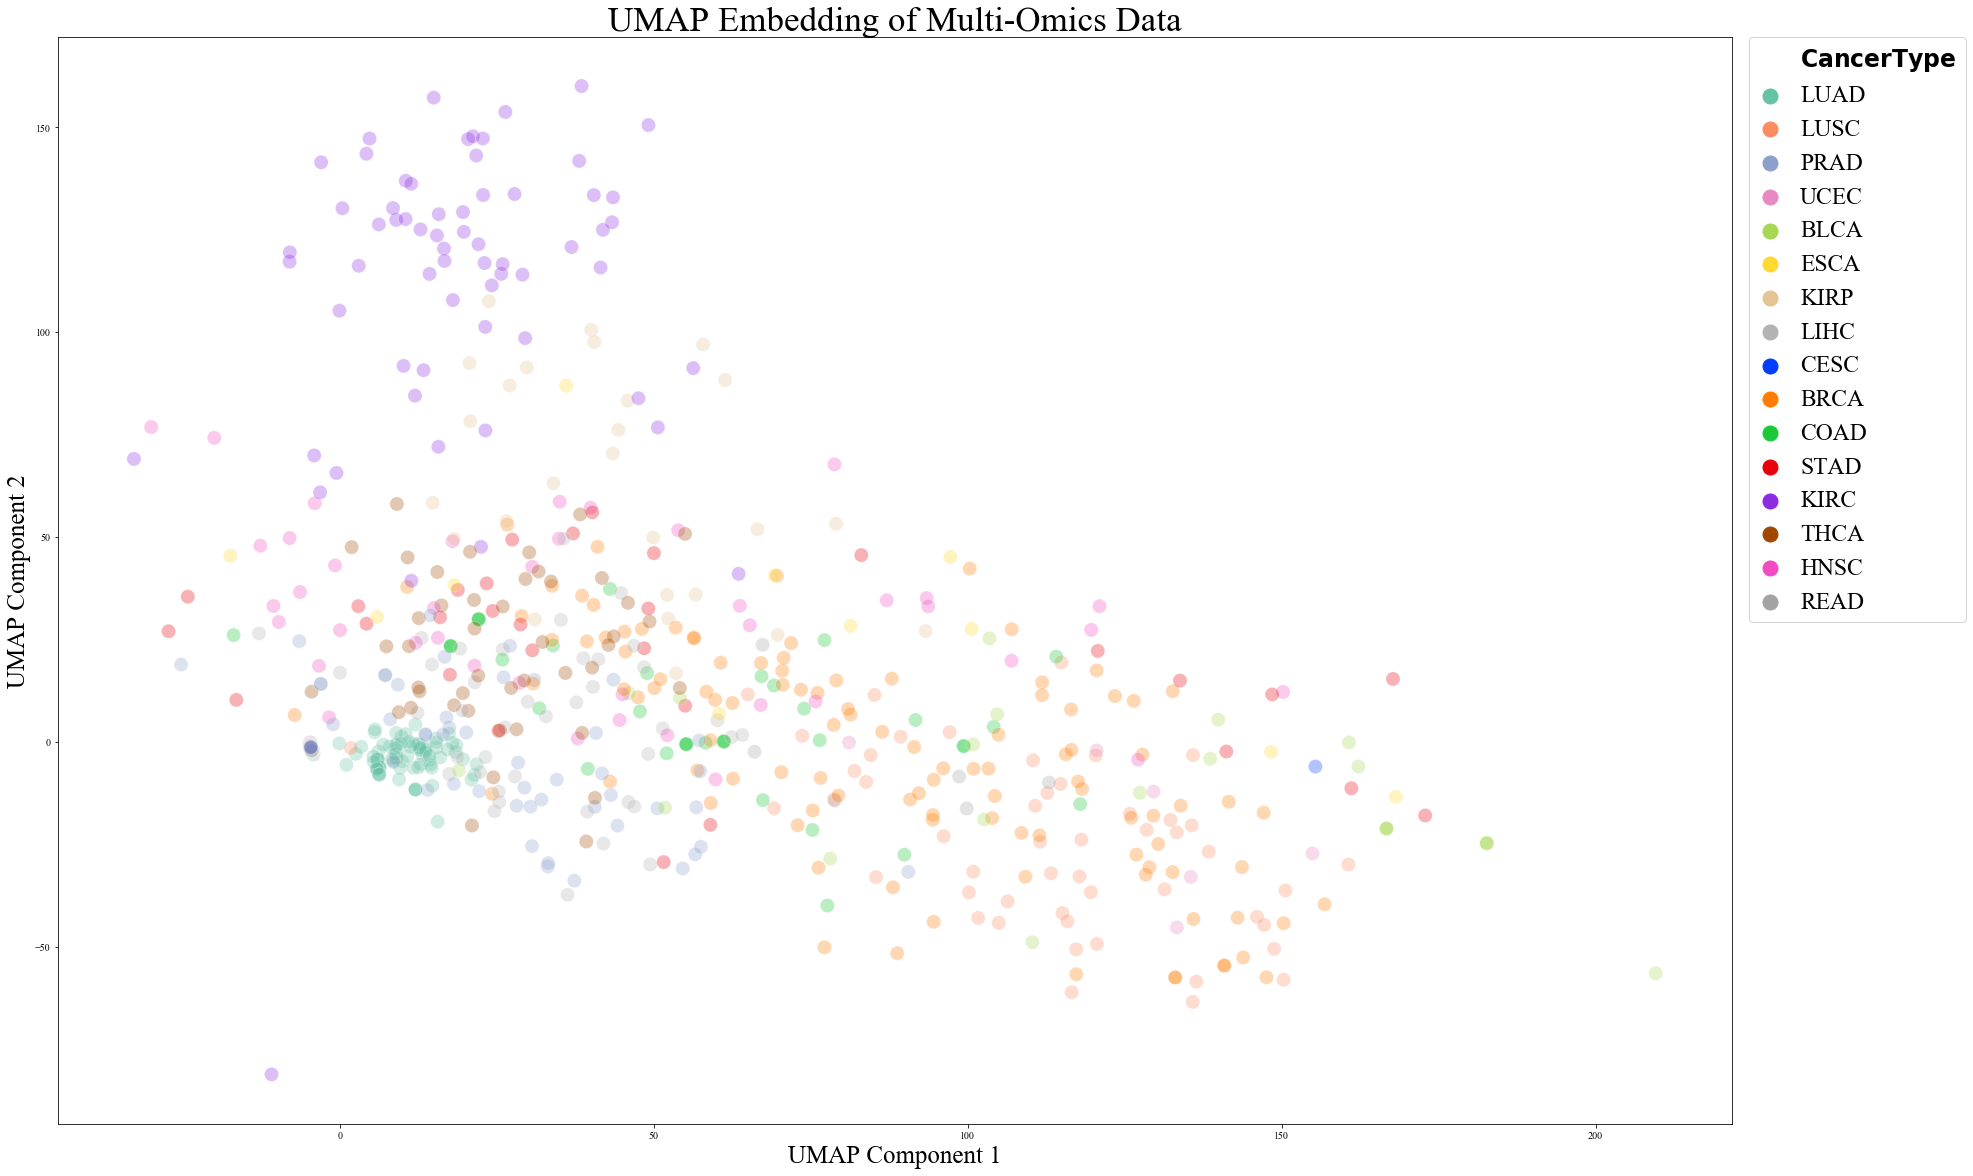

In [22]:
emb_df = pd.DataFrame(emb, index=multi_omics_dataset.index, columns=['PC1', 'PC2'])
emb_df['Type'] = multi_omics_dataset.Cancer_Type.str.upper()

fig = plt.figure(figsize=(30, 20))
g = sns.scatterplot(data=emb_df, x='PC1', y='PC2', hue='Type',
                    alpha=0.3, s=200, palette=sns.color_palette("Set2", n_colors=8)+sns.color_palette("bright", n_colors=8))
g.set_xlabel('UMAP Component 1', fontsize=25)
g.set_ylabel('UMAP Component 2', fontsize=25)
legend = plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., prop={'size': 23.5}, handlelength=1,
                    markerscale=2.5)
legend.texts[0].set_text(r"$\bf{Cancer Type}$")
#legend.texts[17].set_text(r"$\bf{Type}$")
g.set_title('UMAP Embedding of Multi-Omics Data', fontsize=35)
fig.savefig('../../data/pancancer/TCGA/expression/UMAP_embedding_multiomics.png', dpi=300)